In [48]:
import pandas as pd
from scipy import stats
import numpy as np


In [2]:
# Read data 
df_data = pd.read_csv('data_test.csv')

In [3]:
df_data

,1,2,3,4,5,6,7,8,9,10,...,246,247,248,249,250,251,252,253,254,shape
0,232,232,232,120,120,120,120,210,120,117,...,120,120,120,120,219,232,124,120,120,triangle


In [67]:
df_data_data = df_data.iloc[:1,:-1].T

In [32]:
z = stats.zscore(df_data_data, axis=1)

In [33]:
z > 1

,1,2,3,4,5,6,7,8,9,10,...,245,246,247,248,249,250,251,252,253,254
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
Q1 = df_data_data.quantile(0.25)
Q3 = df_data_data.quantile(0.7)
IQR = Q3 - Q1

# Definieren der Grenzen für Ausreißer
untere_grenze = Q1 - 1.5 * IQR
obere_grenze = Q3 + 1.5 * IQR

In [87]:
df_bereinigt = df_data_data[(df_data_data >= untere_grenze) & (df_data_data <= obere_grenze)]

In [90]:
df_int= df_bereinigt.interpolate().T

In [92]:
df_int.to_csv('data_bereinigt.csv', index=False)

<Axes: >

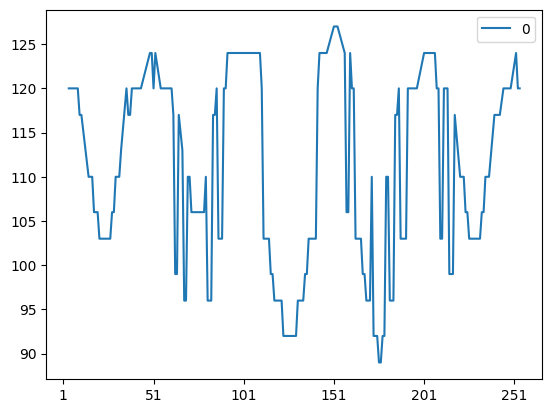

In [94]:
df_int.T.plot()

In [95]:
df_int_trans =df_int.T

<Axes: >

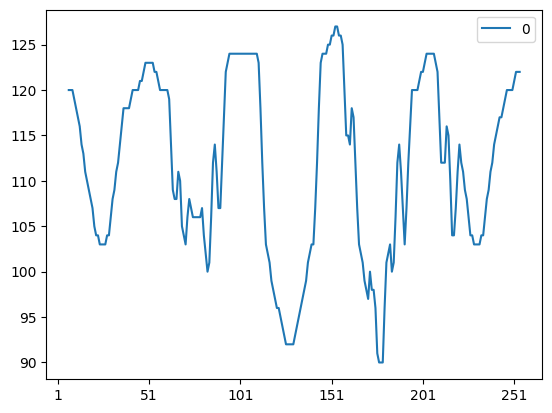

In [102]:
round(df_int_trans.rolling(window = 4).mean()).plot()